In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib
import os.path
import re
!pip install tld
from tld import get_tld
import tldextract
data = pd.read_csv("benign_domain_list.csv")
#data = data[:100]
data

,Domain
0,google.com
1,facebook.com
2,a-msedge.net
3,youtube.com
4,microsoft.com
...,...
4958,bethesda.net
4959,shopifysvc.com
4960,instana.io
4961,oanda.com


In [30]:
# I added domain length, uinque counts and actual domain. The unique counts
# does not work so skip that part
domain_list = []
domain_len_list=[]
five_list = []
digit_count_list=[]
unique_count_list = []
tld_list = []
for url in data['Domain']:
    tld = get_tld(url, fix_protocol=True)

    tld_list.append(tld)
    domain = tldextract.extract(url).domain
    domain_list.append(domain)
    domain_len_list.append(len(domain))
    digits_count_domain = [domain.count(x) for x in "1234567890"]
    digit_count_list.append(sum(digits_count_domain))
    unique_count_domain = len(set(domain))
    unique_count_list.append(unique_count_domain)
    if len(domain) >= 1 and len(domain) <= 5:
        five_list.append('1-5')
    elif len(domain) >= 6 and len(domain) <= 10:
        five_list.append('6-10')
    elif len(domain) >= 11 and len(domain) <= 15:
        five_list.append('11-15')
    elif len(domain) >= 16:   
        five_list.append('16')
data['TLD']= tld_list
data['domain_length'] = domain_len_list
data['ActualDomain']= domain_list
data['rank'] = five_list
data['digit_counts']= digit_count_list
data['unique_counts']= unique_count_list
data

,Domain,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
0,google.com,com,6,google,6-10,0,4
1,facebook.com,com,8,facebook,6-10,0,7
2,a-msedge.net,net,8,a-msedge,6-10,0,7
3,youtube.com,com,7,youtube,6-10,0,6
4,microsoft.com,com,9,microsoft,6-10,0,8
...,...,...,...,...,...,...,...
4958,bethesda.net,net,8,bethesda,6-10,0,7
4959,shopifysvc.com,com,10,shopifysvc,6-10,0,9
4960,instana.io,io,7,instana,6-10,0,5
4961,oanda.com,com,5,oanda,1-5,0,4


In [31]:
data["TLD"].value_counts() 

com              2721
net               453
org               313
ru                149
edu               116
                 ... 
id                  1
ac.at               1
apple               1
herokuapp.com       1
gob.ar              1
Name: TLD, Length: 270, dtype: int64

In [32]:
data["unique_counts"].value_counts() 

6     785
7     763
8     718
5     652
4     596
3     452
9     339
10    207
2     188
11    128
12     77
1      23
13     18
14     10
16      4
15      2
17      1
Name: unique_counts, dtype: int64

In [34]:
#This is to count num of digits in domain
digit_count_list=[]

for url in data['Domain']:
    tld = get_tld(url, fix_protocol=True)
    digit = 0
    tld_list.append(tld)
    domain = tldextract.extract(url).domain
    for s in str(domain):
        if s.isdigit():
            digit=digit+1
    digit_count_list.append(digit)
data['digit_counts']= digit_count_list
data

,Domain,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
0,google.com,com,6,google,6-10,0,4
1,facebook.com,com,8,facebook,6-10,0,7
2,a-msedge.net,net,8,a-msedge,6-10,0,7
3,youtube.com,com,7,youtube,6-10,0,6
4,microsoft.com,com,9,microsoft,6-10,0,8
...,...,...,...,...,...,...,...
4958,bethesda.net,net,8,bethesda,6-10,0,7
4959,shopifysvc.com,com,10,shopifysvc,6-10,0,9
4960,instana.io,io,7,instana,6-10,0,5
4961,oanda.com,com,5,oanda,1-5,0,4


,Domain,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
48,fdv2-t-msedge.net,net,13,fdv2-t-msedge,11-15,1,10
54,163.com,com,3,163,1-5,3,3
62,office365.com,com,9,office365,6-10,3,8
116,gvt1.com,com,4,gvt1,1-5,1,4
125,w3.org,org,2,w3,1-5,1,2
...,...,...,...,...,...,...,...
4907,awsdns-49.org,org,9,awsdns-49,6-10,2,8
4915,7oc5b1i3v4iu.top,top,12,7oc5b1i3v4iu,11-15,5,11
4930,awsdns-30.org,org,9,awsdns-30,6-10,2,8
4945,awsdns-59.net,net,9,awsdns-59,6-10,2,8


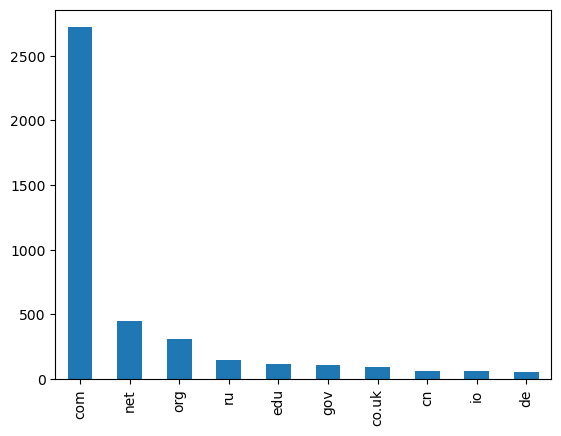

In [59]:
#Top 10 most frequent tlds
top10_tld_df = data['TLD'].value_counts()[0:10];
top10_tld_df.plot(kind='bar');
            

In [95]:
# Checks if domain contains any of the substrings listed.
strings = ["amazon","ebay", "google","youtube","apple","mircosoft","walmart","facebook",
             "instagram", "snapchat"]
b = []
count = 0
for url in data['ActualDomain']:
    for s in strings:
        if s in url:
            count = count +1
            b.append(url)
print(count)
data_from_top_ten_tld = data[data['ActualDomain'].isin(b)]
data_from_top_ten_tld

121


,Domain,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
0,google.com,com,6,google,6-10,0,4
1,facebook.com,com,8,facebook,6-10,0,7
3,youtube.com,com,7,youtube,6-10,0,6
5,amazonaws.com,com,9,amazonaws,6-10,0,7
9,instagram.com,com,9,instagram,6-10,0,8
...,...,...,...,...,...,...,...
4631,google.pt,pt,6,google,6-10,0,4
4850,google.fi,fi,6,google,6-10,0,4
4866,google.dk,dk,6,google,6-10,0,4
4908,google.no,no,6,google,6-10,0,4


In [63]:
data_rank = pd.read_csv("Tranco_ranking.csv")
data_rank

,TLD,Score
0,aaa,0.00
1,abb,0.00
2,abbott,0.00
3,abbvie,0.00
4,abc,0.00
...,...,...
996,zip,0.00
997,zm,0.00
998,zone,0.84
999,zuerich,0.00


In [64]:
new_merged_df = pd.merge(data, data_rank, on=['TLD'])
new_merged_df

,Domain,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts,Score
0,google.com,com,6,google,6-10,0,4,0.17
1,facebook.com,com,8,facebook,6-10,0,7,0.17
2,youtube.com,com,7,youtube,6-10,0,6,0.17
3,microsoft.com,com,9,microsoft,6-10,0,8,0.17
4,amazonaws.com,com,9,amazonaws,6-10,0,7,0.17
...,...,...,...,...,...,...,...,...
4598,itv.kg,kg,3,itv,1-5,0,3,0.00
4599,teleport.sh,sh,8,teleport,6-10,0,6,0.03
4600,hostia.name,name,6,hostia,6-10,0,6,0.76
4601,csiro.au,au,5,csiro,1-5,0,5,0.00


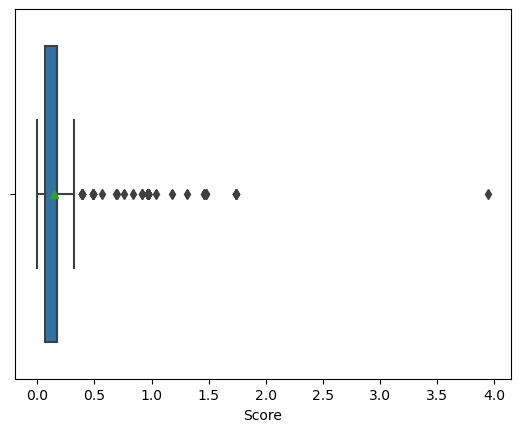

In [93]:
#Visual to show mediam, mean,etc
import seaborn as sns
sns.boxplot(x= new_merged_df['Score'], showmeans=True);

In [94]:
#Actual average listed
new_merged_df.describe()

,domain_length,digit_counts,unique_counts,Score
count,4603.000000,4603.000000,4603.000000,4603.000000
mean,7.570715,0.162937,6.320660,0.145275
std,3.335953,0.588126,2.399329,0.149348
min,1.000000,0.000000,1.000000,0.000000
25%,5.000000,0.000000,5.000000,0.070000
50%,7.000000,0.000000,6.000000,0.170000
75%,9.000000,0.000000,8.000000,0.170000
max,26.000000,5.000000,17.000000,3.950000
